57026/57026 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________
13/13 - 0s - loss: 91.1934 - mae: 7.4709 - 74ms/epoch - 6ms/step
4/4 - 0s - loss: 105.4909 - mae: 7.9577 - 39ms/epoch - 10ms/step
4/4 [==============================] - 0s 8ms/step


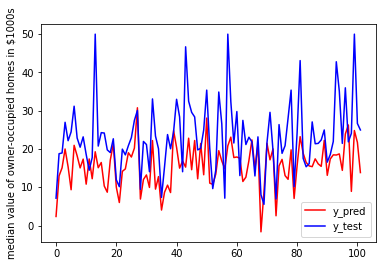

In [1]:
#23_01
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
##print("x_train.shape=",x_train.shape) # (404, 13)
##print("y_train.shape=",y_train.shape) # (404,)
##print("x_test.shape=", x_test.shape)  # (102, 13)
##print("y_test.shape=", y_test.shape)  # (102,)

model = tf.keras.Sequential()

#1: 1-layer
##model.add(tf.keras.layers.Dense(units=1, input_dim=x_train.shape[1]))# x_train.shape[1]=13

#2:  3-layer
model.add(tf.keras.layers.Dense(units=10, input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dense(units=10))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mae']) #mean absolute error
ret = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)

train_loss = model.evaluate(x_train, y_train, verbose=2)
test_loss = model.evaluate(x_test, y_test, verbose=2)

##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

y_pred = model.predict(x_test)
##print("y_pred:", y_pred)

plt.ylabel("median value of owner-occupied homes in $1000s")
plt.plot(y_pred, "r-", label="y_pred")
plt.plot(y_test, "b-", label="y_test")
plt.legend(loc='best')
plt.show()

In [ ]:
#24_01
from tensorflow.keras.datasets import imdb
import numpy as np

#1
##(x_train, y_train), (x_test, y_test) = imdb.load_data() # index_from=3

#2
(x_train, y_train), (x_test, y_test) = imdb.load_data(skip_top=15, num_words=101)

##print("x_train.shape=",x_train.shape) # (25000,)
##print("y_train.shape=",y_train.shape) # (25000,)
##print("x_test.shape=", x_test.shape)  # (25000,)
##print("y_test.shape=", y_test.shape)  # (25000,)

#3
##nlabel, count = np.unique(y_train, return_counts=True)
##print("nlabel:", nlabel)
##print("count:",  count)
##print("# of Class:",  len(nlabel) ) # 2

print("max(x_train words):", max(len(x) for x in x_train)) # 2494
print("max(x_test words):",  max(len(x) for x in x_test)) # 2315
print("x_train[0]:", x_train[0])
print("y_train[0]:", y_train[0])

#4: decoding x_train[n], reverse from integers to words
# ref: https://builtin.com/data-science/how-build-neural-network-keras
n = 0
index = imdb.get_word_index()
reverse_index  = dict([(value, key) for (key, value) in index.items()]) 
review = " ".join( [reverse_index.get(i-3, "?") for i in x_train[n]] )
print("review of x_train[{}]:\n{}".format(n, review))


In [ ]:
#24_02
import tensorflow as tf
import numpy as np
#1
texts = ['This is a film','This is not a film']
top_words= 10 # maximum integer index + 1

#2
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(texts)
print("tokenizer.word_index:",tokenizer.word_index)

#3
sequences = tokenizer.texts_to_sequences(texts)
print("sequences:",sequences)

#4: each vector length: top_words = 10
output_vector = tokenizer.sequences_to_matrix(sequences) # mode='binary'
print("output_vector.shape=", output_vector.shape) # (2, 10)
print(output_vector)


In [ ]:
#24_03
import tensorflow as tf
import numpy as np
#1
texts = ['This is a film','This is not a film']
top_words    = 10  # maximum integer index + 1
max_words    = 6  # sequences.shape[1]
vecor_length = 3  # dimension of the dense embedding

#2
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(texts)
print("tokenizer.word_index:",tokenizer.word_index)

#3
sequences = tokenizer.texts_to_sequences(texts)
print("sequences:",sequences)

#4
sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, max_words)
print('sequences.shape=', sequences.shape)
print("sequences:", sequences)

#5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim =top_words, output_dim=vecor_length))
##model.add(tf.keras.layers.Flatten()) # output_vector.shape = (2, 18)
model.summary()

#6
output_vector = model.predict(sequences)
print("output_vector.shape:", output_vector.shape )
print("output_vector:", output_vector )


In [ ]:
#24_04
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (25000,)
##print("x_test.shape=", x_test.shape)  # (25000,)

#2: binary encoding
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
x_train = tokenizer.sequences_to_matrix(x_train) # mode='binary'
x_test = tokenizer.sequences_to_matrix(x_test)
##print("x_train.shape=",x_train.shape) # (25000, 1000)
##print("x_test.shape=", x_test.shape)  # (25000, 1000)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_dim = top_words, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=1280, verbose=0)

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


In [ ]:
#24_05
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (25000,)
##print("x_test.shape=", x_test.shape)  # (25000,)

#2
max_words = 100
x_train= tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_words)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,  maxlen=max_words)
####print("x_train.shape=",x_train.shape) # (25000, 100)
####print("x_test.shape=", x_test.shape)  # (25000, 100)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
vecor_length = 10   # dimension of the dense embedding
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim =top_words,
                                    output_dim=vecor_length,
                                    input_length=max_words))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=0)
loss = ret.history['loss']
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


In [ ]:
#25_01
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = reuters.load_data()

#2
##(x_train, y_train), (x_test, y_test) = reuters.load_data(skip_top=15, num_words=101)
##print("x_train.shape=",x_train.shape) # (8982,)
##print("y_train.shape=",y_train.shape) # (8982,)
##print("x_test.shape=", x_test.shape)  # (2246,)
##print("y_test.shape=", y_test.shape)  # (2246,)

#3
##nlabel, count = np.unique(y_train, return_counts=True)
##print("nlabel:", nlabel)
##print("count:",  count)
##print("# of Class:",  len(nlabel) ) # 46 

##print("max(x_train words):", max(len(x) for x in x_train))# 2376
##print("max(x_test words):",  max(len(x) for x in x_test)) # 1032

#https://github.com/SteffenBauer/KerasTools/blob/master/KerasTools/datasets/decode.py
label = ('cocoa','grain','veg-oil','earn','acq','wheat','copper','housing',
              'money-supply','coffee','sugar','trade','reserves','ship','cotton',
              'carcass','crude','nat-gas','cpi','money-fx','interest','gnp',
              'meal-feed','alum','oilseed','gold','tin','strategic-metal',
              'livestock','retail','ipi','iron-steel','rubber','heat','jobs',
              'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead')
##print("x_train[0]:", x_train[0])

#4: decoding x_train[n], reverse from integers to words
# 0, 1, 2: 'padding', 'start of sequence', and 'unknown word'
n = 0 # n = 584, it's cocoa news
print("y_train[{}]={}".format(n, y_train[n]))
print("News label: {}".format(label[y_train[n]]))

index = reuters.get_word_index()
reverse_index  = dict([(value, key) for (key, value) in index.items()]) 
review = " ".join( [reverse_index.get(i-3, "?") for i in x_train[n]] )
print("review of x_train[{}]:\n{}".format(n, review))


In [ ]:
#25_02
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt
#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (8982,)
##print("x_test.shape=", x_test.shape)  # (2246,)

#2: binary encoding
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_words)
x_train = tokenizer.sequences_to_matrix(x_train) # mode='binary'
x_test = tokenizer.sequences_to_matrix(x_test)
##print("x_train.shape=",x_train.shape) # (8982, 1000)
##print("x_test.shape=", x_test.shape)  # (2246, 1000)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_dim = top_words, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=46, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=2)
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


In [ ]:
#25_03
import tensorflow as tf
from tensorflow.keras.datasets import reuters
import numpy as np
import matplotlib.pyplot as plt

#1
top_words    = 1000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=top_words)
##print("x_train.shape=",x_train.shape) # (8982,)
##print("x_test.shape=", x_test.shape)  # (2246,)
 
#2
max_words = 100
x_train= tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_words)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,  maxlen=max_words)
####print("x_train.shape=",x_train.shape) # (8982, 100)
####print("x_test.shape=", x_test.shape)  # (2246, 100)

# one-hot encoding: 'mse', 'categorical_crossentropy'  
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
##print("y_train=", y_train)
##print("y_test=", y_test)

#3
vecor_length = 10    # dimension of the dense embedding
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim =top_words,
                                    output_dim=vecor_length,
                                    input_length=max_words))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=46, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=128, verbose=0)
##loss = ret.history['loss']
##plt.plot(loss)
##plt.xlabel('epochs')
##plt.ylabel('loss')
##plt.show()

#4
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)


In [ ]:
#26_01
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train.shape=", x_train.shape) # (60000, 28, 28)
print("y_train.shape=", y_train.shape) # (60000,)
print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
print("y_test.shape=",  y_test.shape)  # (10000,)

#2
nlabel, count = np.unique(y_train, return_counts=True)
print("nlabel:", nlabel)
print("count:",  count)
print("# of Class:",  len(nlabel) )

#3: display images
print("y_train[:8]=",y_train[:8])
fig = plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)  
    plt.imshow(x_train[i], cmap='gray')
    plt.axis("off")
fig.tight_layout()
plt.show()


In [ ]:
#26_02
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
##print("x_train.shape=", x_train.shape) # (60000, 28, 28)
##print("y_train.shape=", y_train.shape) # (60000,)
##print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
##print("y_test.shape=",  y_test.shape)  # (10000,)

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test  /= 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) # (60000, 10)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000, 10)

#4: x_train.shape = (60000, 28, 28)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=20, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

##model = tf.keras.Sequential()
##model.add(tf.keras.layers.Input(shape = (28,28)))
##model.add(tf.keras.layers.Flatten())
##model.add(tf.keras.layers.Dense(units=20))
##model.add(tf.keras.layers.Activation('sigmoid'))
##model.add(tf.keras.layers.Dense(units=10))
##model.add(tf.keras.layers.Activation('softmax'))
##model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400,
                validation_split=0.2, verbose=0)

#5
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#6
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


In [ ]:
#27_01
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape=", x_train.shape) # (60000, 28, 28)
print("y_train.shape=", y_train.shape) # (60000,)
print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
print("y_test.shape=",  y_test.shape)  # (10000,)

#2
nlabel, count = np.unique(y_train, return_counts=True)
print("nlabel:", nlabel)
print("count:",  count)
print("# of Class:",  len(nlabel) ) # 10

#3: display images
label = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

print("y_train[:8]=", y_train[:8])
fig = plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1, )  
    plt.imshow(x_train[i], cmap='gray')
    plt.gca().set_title(label[y_train[i]])
    plt.axis("off")
fig.tight_layout()
plt.show()


In [ ]:
#27_02
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
##print("x_train.shape=", x_train.shape) # (60000, 28, 28)
##print("y_train.shape=", y_train.shape) # (60000,)
##print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
##print("y_test.shape=",  y_test.shape)  # (10000,)

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test  /= 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train) # (60000, 10)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000, 10)

#4: x_train.shape = (60000, 28, 28)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=20, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400,
                validation_split=0.2, verbose=2)

#5
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#6
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


In [ ]:
#28_01
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
#1
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
print("y_train.shape=", y_train.shape) # (50000, 1)
print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)
print("y_test.shape=",  y_test.shape)  # (10000, 1)

#2
y_train = y_train.flatten() 
y_test  = y_test.flatten()
print("y_train.shape=", y_train.shape) # (50000,)
print("y_test.shape=",  y_test.shape)  # (10000,)

#3
nlabel, count = np.unique(y_train, return_counts=True)
print("nlabel:", nlabel)
print("count:",  count)
print("# of Class:",  len(nlabel) )

#4
label = ('Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
         'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
print("y_train[:8]=",y_train[:8])

fig = plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1, )  
    plt.imshow(x_train[i], cmap='gray')
    plt.gca().set_title(label[y_train[i]])
    plt.axis("off")
fig.tight_layout()
plt.show()


In [ ]:
#28_02
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
##print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
##print("y_train.shape=", y_train.shape) # (50000, 1)
##print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)
##print("y_test.shape=",  y_test.shape)  # (10000, 1)

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
def normalize_image(image): # 3-channel
    mean=  np.mean(image, axis = (0, 1, 2))
    std =  np.std(image,  axis = (0, 1, 2))
    image = (image-mean)/std
    return image
x_train= normalize_image(x_train) # range: N(mean=0, std=1]
x_test = normalize_image(x_test)

#3: flattenning images(x_train, x_test)
# using this flattenning, do not use Flatten layer in model
ndim  = x_train.shape[1]*x_train.shape[2]*x_train.shape[3] # 32*32*3=3072
x_train = x_train.reshape(-1, ndim)  # Flatten
x_test  = x_test.reshape(-1,  ndim)  # Flatten
##print("x_train.shape=", x_train.shape) # (50000, 3072)
##print("x_test.shape=",  x_test.shape)  # (10000, 3072)

#4: preprocessing the target(y_train, y_test)
y_train = y_train.flatten() 
y_test  = y_test.flatten()
##print("y_train.shape=", y_train.shape) # (50000,)
##print("y_test.shape=",  y_test.shape)  # (10000,)

# one-hot encoding: 'mse', 'categorical_crossentropy'
y_train = tf.keras.utils.to_categorical(y_train) # (50000, 10)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000, 10)

#5
model = tf.keras.Sequential()
#x_train.shape = (50000, 3072)
model.add(tf.keras.layers.Dense(units=50,  input_dim = ndim, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# x_train.shape = (50000, 32, 32, 3)
##model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
##model.add(tf.keras.layers.Dense(units=50, activation='sigmoid'))
##model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=100, batch_size=400, 
               validation_split=0.2, verbose=2)

#6
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#7: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()


In [ ]:
#29_01
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt

#1
mode = 'coarse' # 'fine'
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode=mode)
print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
print("y_train.shape=", y_train.shape) # (50000, 1)
print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)
print("y_test.shape=",  y_test.shape)  # (10000, 1)

#2
y_train = y_train.flatten() 
y_test  = y_test.flatten()
print("y_train.shape=", y_train.shape) # (50000,)
print("y_test.shape=",  y_test.shape)  # (10000,)

#3
nlabel, count = np.unique(y_train, return_counts=True)
print("nlabel:", nlabel)
print("count:",  count)
print("# of Class:",  len(nlabel) )

#4
#https://github.com/SteffenBauer/KerasTools/blob/master/KerasTools/datasets/decode.py
coarse_label = ('Aquatic mammal', 'Fish', 
               'Flower', 'Food container', 
               'Fruit or vegetable', 'Household electrical device', 
               'Household furniture', 'Insect', 
               'Large carnivore', 'Large man-made outdoor thing', 
               'Large natural outdoor scene', 'Large omnivore or herbivore',
               'Medium-sized mammal', 'Non-insect invertebrate',
               'People', 'Reptile', 
               'Small mammal', 'Tree',
               'Vehicles Set 1', 'Vehicles Set 2')
fine_label = ('Apple', 'Aquarium fish', 'Baby', 'Bear', 'Beaver', 
              'Bed', 'Bee', 'Beetle', 'Bicycle', 'Bottle', 
              'Bowl', 'Boy', 'Bridge', 'Bus', 'Butterfly', 
              'Camel', 'Can', 'Castle', 'Caterpillar', 'Cattle', 
              'Chair', 'Chimpanzee', 'Clock', 'Cloud', 'Cockroach', 
              'Couch', 'Crab', 'Crocodile', 'Cups', 'Dinosaur', 
              'Dolphin', 'Elephant', 'Flatfish', 'Forest', 'Fox', 
              'Girl', 'Hamster', 'House', 'Kangaroo', 'Computer keyboard',
              'Lamp', 'Lawn-mower', 'Leopard', 'Lion', 'Lizard', 
              'Lobster', 'Man', 'Maple', 'Motorcycle', 'Mountain', 
              'Mouse', 'Mushrooms', 'Oak', 'Oranges', 'Orchids', 
              'Otter', 'Palm', 'Pears', 'Pickup truck', 'Pine', 
              'Plain', 'Plates', 'Poppies', 'Porcupine', 'Possum', 
              'Rabbit', 'Raccoon', 'Ray', 'Road', 'Rocket', 
              'Roses', 'Sea', 'Seal', 'Shark', 'Shrew', 
              'Skunk', 'Skyscraper', 'Snail', 'Snake', 'Spider', 
              'Squirrel', 'Streetcar', 'Sunflowers', 'Sweet peppers', 'Table', 
              'Tank', 'Telephone', 'Television', 'Tiger', 'Tractor', 
              'Train', 'Trout', 'Tulips', 'Turtle', 'Wardrobe', 
              'Whale', 'Willow', 'Wolf', 'Woman', 'Worm')

print("y_train[:8]=",y_train[:8])
fig = plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1, )  
    plt.imshow(x_train[i], cmap='gray')
    if mode == 'coarse':
        title = coarse_label[y_train[i]]
    else: # 'fine'
        title = fine_label[y_train[i]]        
    plt.gca().set_title(title)
    plt.axis("off")
fig.tight_layout()
plt.show()


In [ ]:
#29_02
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = cifar100.load_data() #' fine'
##print("x_train.shape=", x_train.shape) # (50000, 32, 32, 3)
##print("y_train.shape=", y_train.shape) # (50000, 1)
##print("x_test.shape=",  x_test.shape)  # (10000, 32, 32, 3)
##print("y_test.shape=",  y_test.shape)  # (10000, 1)

#2:normalize images
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
def normalize_image(image): # 3-channel
    mean=  np.mean(image, axis = (0, 1, 2))
    std =  np.std(image,  axis = (0, 1, 2))
    image = (image-mean)/std
    return image
x_train= normalize_image(x_train) # range: N(mean=0, std=1]
x_test = normalize_image(x_test)

#3
nlabel, count = np.unique(y_train, return_counts=True)
nClass = len(nlabel) # 'fine': 100, 'coarse':20

#4: preprocessing the target(y_train, y_test)
y_train = y_train.flatten() 
y_test  = y_test.flatten()
##print("y_train.shape=", y_train.shape) # (50000,)
##print("y_test.shape=",  y_test.shape)  # (10000,)

# one-hot encoding: 'mse', 'categorical_crossentropy'
y_train = tf.keras.utils.to_categorical(y_train) # (50000, nClass)
y_test = tf.keras.utils.to_categorical(y_test)   # (10000, nClass)

#5
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Dense(units=100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=nClass, activation='softmax'))
model.summary()

opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=['accuracy'])
ret = model.fit(x_train, y_train, epochs=200, batch_size=200, 
               validation_split=0.2, verbose=2)

#6
y_pred = model.predict(x_train)
y_label = np.argmax(y_pred, axis = 1)
C = tf.math.confusion_matrix(np.argmax(y_train, axis = 1), y_label)
print("confusion_matrix(C):", C)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

#7: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(ret.history['loss'],  "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')

ax[1].plot(ret.history['accuracy'],     "b-", label="train accuracy")
ax[1].plot(ret.history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
plt.legend(loc="best")
fig.tight_layout()
plt.show()
